In [1]:
import glob
from operator import itemgetter
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
RHC_files = glob.glob("./assets/results/nn_weight/RHC/*.csv")
BP_files = glob.glob("./assets/results/nn_weight/BP/*.csv")
GA_files = glob.glob("./assets/results/nn_weight/GA/*.csv")
SA_files = glob.glob("./assets/results/nn_weight/SA/*.csv")

In [3]:
def nn_results_df(files):
    cols = columns=["min_MSE_test", "min_MSE_ind", "MSE_time",
                    "max_acc_test", "max_acc_ind", "acc_time"]

    df_results = pd.DataFrame(columns=cols)

    for i in files:
        df_m = pd.read_csv(i)
        file_name = i.split('/')[-1]
        min_ind = df_m['MSE_tst'].idxmin()
        min_mse_tst = df_m.loc[min_ind, 'MSE_tst']
        idx_mse_tst = df_m.loc[min_ind, 'iteration']
        tme_mse_tst = df_m.loc[min_ind, 'elapsed']

        max_ind = df_m['acc_tst'].idxmax()
        max_acc_tst = df_m.loc[max_ind, 'acc_tst']
        idx_acc_tst = df_m.loc[max_ind, 'iteration']
        tme_acc_tst = df_m.loc[max_ind, 'elapsed']

        results = [min_mse_tst, idx_mse_tst, tme_mse_tst, 
                   max_acc_tst, idx_acc_tst, tme_acc_tst]

        df_t = pd.DataFrame(index=[file_name], 
                            data=[results],
                            columns=cols, dtype='float'
                           )
        df_results = pd.concat([df_results, df_t], axis=0)
        
    return df_results
    
def plot_train_test(log_file, title, MSE=True):

    df = pd.read_csv(log_file)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title)
    target = {'MSE' : ['MSE_trg', 'MSE_tst'],
              'acc' : ['acc_trg', 'acc_tst']}
    
    if MSE: y = target['MSE']
    else: y = target['acc']
        
    sns.lineplot(x='iteration', y=y[0], data=df, ax=ax)
    sns.lineplot(x='iteration', y=y[1], data=df, ax=ax)
    if MSE: ax.set_ylabel('MSE')
    else: ax.set_ylabel('acc')
        
    labels = []
    for i in zip(ax.get_lines(), y):
        i[0].set_label(i[1])
        labels.append(i[0])
    
    ax.legend(handles=labels, prop={'size': 12})
    
    if MSE: best_ind = df[y[1]].idxmin()
    else: best_ind = df[y[1]].idxmax()
        
    if MSE:
        ax.vlines(x=df.loc[best_ind, 'iteration'], ymin=0, ymax=df[y[1]].max()/2, 
                  linestyles='dashed')

        ax.text(df.loc[best_ind, 'iteration'], df[y[1]].max()/2, 
                '{:.3f}'.format(df.loc[best_ind, y[1]]))
    else:
        ax.vlines(x=df.loc[best_ind, 'iteration'], ymin=0, ymax=1, 
                  linestyles='dashed')

        ax.text(df.loc[best_ind, 'iteration'], 0.98, 
                '{:.3f}'.format(df.loc[best_ind, y[1]]))
    plt.grid(True)
    plt.show()
    
def plot_index_vs_best(df_results, title):
    fig = plt.figure(figsize=(15,6))
    fig.suptitle(title)
    ax = plt.subplot('121')
    sns.lineplot(x='min_MSE_ind', y='min_MSE_test', data=df_results, ax=ax)
    ax.set_title("Min Mean Squared Error vs Iteration Number")
    ax.set_xlabel("Index")
    ax.set_ylabel("MSE")
    plt.grid()
    
    ax = plt.subplot('122')
    sns.lineplot(x='max_acc_ind', y='max_acc_test', data=df_results, ax=ax)
    ax.set_title("Max Test Accuracy vs Iteration Number")
    ax.set_xlabel("Index")
    ax.set_ylabel("Accuracy")
    plt.grid()

    plt.show()

~~~~
For Back Prop
Average best test MSE: 0.0429775347246
Average number of iterations to best MSE: 42.0
Average training time for best MSE: 0.11867534960000001

Average best test Accuracy: 0.8924
Average number of iterations to best accuracy: 74.0
Average training time for best acc: 0.1950212885



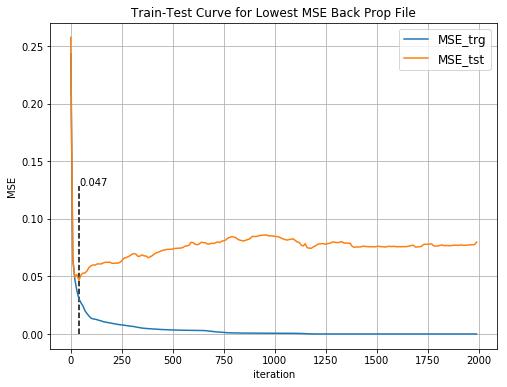

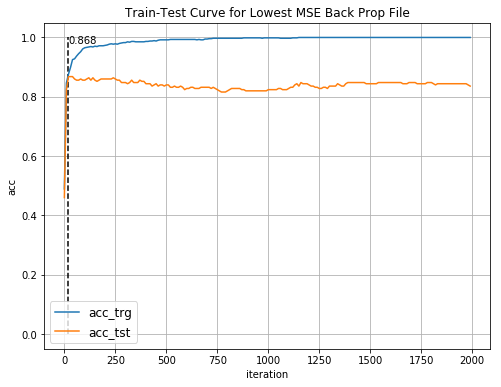

~~~~
For Random Hill Climb
Average best test MSE: 0.03814786998955001
Average number of iterations to best MSE: 4024.0
Average training time for best MSE: 3.9067870049

Average best test Accuracy: 0.9099999999999999
Average number of iterations to best accuracy: 3996.0
Average training time for best acc: 3.8400922588



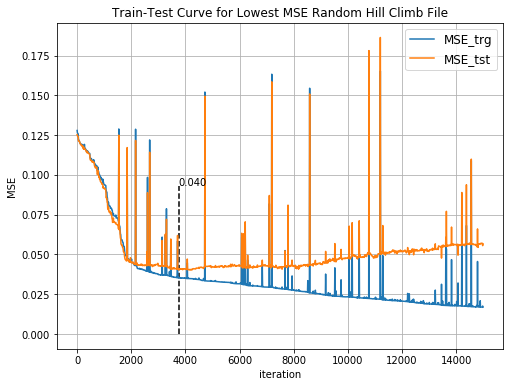

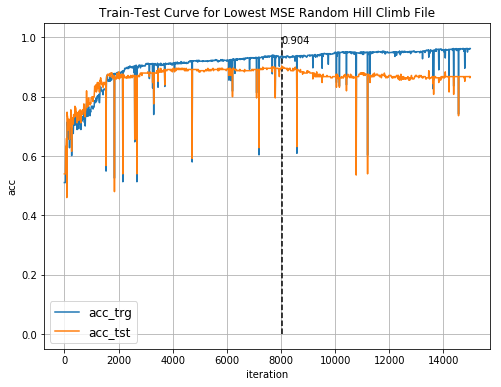

In [4]:
files = {"Back Prop" : BP_files, 
         "Random Hill Climb" : RHC_files}

for name, file in files.items():
    df_results = nn_results_df(file)
    print("~~~~")
    print("For {}".format(name))
    print("Average best test MSE:", df_results['min_MSE_test'].mean())
    print("Average number of iterations to best MSE:", df_results['min_MSE_ind'].mean())
    print("Average training time for best MSE:", df_results['MSE_time'].mean())
    print()
    print("Average best test Accuracy:", df_results['max_acc_test'].mean())
    print("Average number of iterations to best accuracy:", df_results['max_acc_ind'].mean())
    print("Average training time for best acc:", df_results['acc_time'].mean())
    print()
    
    max_fitness_id = df_results['min_MSE_test'].idxmax()
    plot_file = [i for i in file if i.endswith(max_fitness_id)][0]
    plot_train_test(plot_file, "Train-Test Curve for Lowest MSE {} File".format(name))
    plot_train_test(plot_file, "Train-Test Curve for Lowest MSE {} File".format(name), MSE=False)

~~~~
For Simulated Annealing
File for lowest test MSE: SA_T10_CE4LOG.csv
Lowest test MSE achieved at iteration: 3930.0
Achieving an MSE of: 0.031124695118900002
This took: 4.100302036(s)

File for highest test accuracy: SA_T10_CE4LOG.csv
File for highest test accuracy: SA_T10_CE4LOG.csv
Highest test accuracy achieved at iteration: 3660.0
Achieving an accuracy of: 0.932
This took: 3.832281923(s)



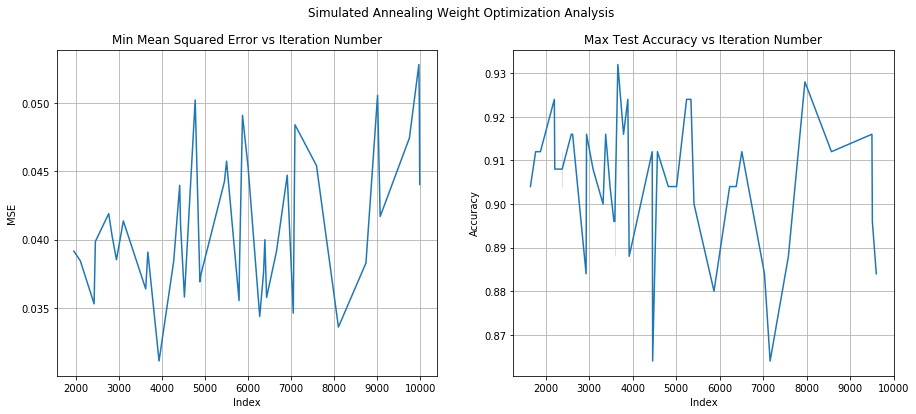

~~~~
For Genetic Algorithms
File for lowest test MSE: GA_P100_mate40_mut20LOG.csv
Lowest test MSE achieved at iteration: 5750.0
Achieving an MSE of: 0.0328419809476
This took: 274.084309759(s)

File for highest test accuracy: GA_P100_mate40_mut20LOG.csv
File for highest test accuracy: GA_P100_mate40_mut20LOG.csv
Highest test accuracy achieved at iteration: 5330.0
Achieving an accuracy of: 0.9279999999999999
This took: 254.243352925(s)



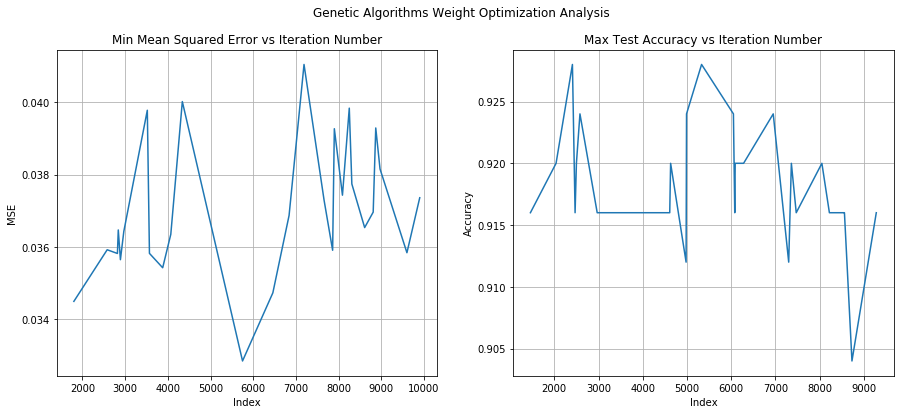

In [5]:
for file in [(SA_files, 'Simulated Annealing'), (GA_files, 'Genetic Algorithms')]:
    df_results = nn_results_df(file[0])
    
    print("~~~~")
    print("For {}".format(file[1]))
    mse_file = df_results['min_MSE_test'].idxmin()
    print("File for lowest test MSE:", mse_file)
    print("Lowest test MSE achieved at iteration:", df_results.loc[mse_file, 'min_MSE_ind'])
    print("Achieving an MSE of:", df_results.loc[mse_file, 'min_MSE_test'])
    print("This took: {}(s)".format(df_results.loc[mse_file, 'MSE_time']))
    print()
    acc_file = df_results['max_acc_test'].idxmax()
    print("File for highest test accuracy:", acc_file)

    acc_file = df_results['max_acc_test'].idxmax()
    print("File for highest test accuracy:", acc_file)
    print("Highest test accuracy achieved at iteration:", df_results.loc[acc_file, 'max_acc_ind'])
    print("Achieving an accuracy of:", df_results.loc[acc_file, 'max_acc_test'])
    print("This took: {}(s)\n".format(df_results.loc[acc_file, 'acc_time']))
    
    plot_index_vs_best(df_results, file[1] + " Weight Optimization Analysis")

In [6]:
unique_temps = list(set([i.split('/')[-1].split('_')[1] for i in SA_files]))
unique_ce = list(set([i.split('/')[-1].split('_')[2] for i in SA_files]))
from IPython.display import display

for temp in ['100000']:
    files = [i for i in SA_files if i.find(temp + "_") != -1]
    df_results = nn_results_df(files)
    print("\nFor: ", temp)
    print("Average MSE is {:.3f}".format(df_results['min_MSE_test'].mean()))
    print("Average acc is {:.3f}".format(df_results['max_acc_test'].mean()))
    max_id = df_results['max_acc_test'].idxmax().split('CE')[1]
    max_id = max_id.split('L')[0]
    max_id = max_id.ljust(2, '0')
    print("Highest acc CE Value is", max_id)
    display(df_results)


For:  100000
Average MSE is 0.039
Average acc is 0.909
Highest acc CE Value is 90


,min_MSE_test,min_MSE_ind,MSE_time,max_acc_test,max_acc_ind,acc_time
SA_T100000_CE9LOG.csv,0.035543,5790.0,5.344086,0.924,5340.0,4.932730
SA_T100000_CE6LOG.csv,0.039990,6390.0,5.838257,0.904,6230.0,5.687315
SA_T100000_CE8LOG.csv,0.037601,6360.0,5.917351,0.912,6510.0,6.055940
SA_T100000_CE4LOG.csv,0.038447,2100.0,1.932839,0.904,1650.0,1.519587
SA_T100000_CE99LOG.csv,0.045735,5500.0,5.095686,0.884,7030.0,6.508676
SA_T100000_CE2LOG.csv,0.034618,7050.0,6.512161,0.924,3890.0,3.563549


In [7]:
labels = [0.20, 0.60, 0.99, 0.40, 0.80, 0.90]
min_mse = list(zip(labels, df_results['min_MSE_test']))
min_mse.sort(key=itemgetter(0))
min_mse_ind = list(zip(labels, df_results['min_MSE_ind']))
min_mse_ind.sort(key=itemgetter(0))
max_acc = list(zip(labels, df_results['max_acc_test']))
max_acc.sort(key=itemgetter(0))
max_acc_ind = list(zip(labels, df_results['max_acc_ind']))
max_acc_ind.sort(key=itemgetter(0))

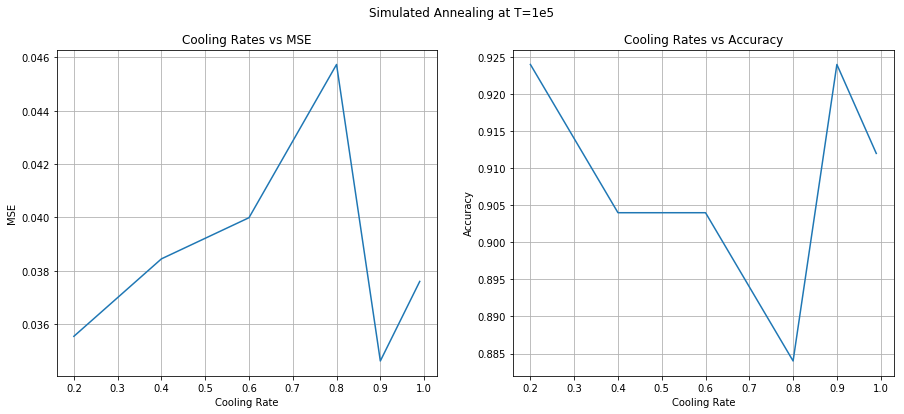

In [8]:
fig = plt.figure(figsize=(15,6))
fig.suptitle("Simulated Annealing at T=1e5")

ax = plt.subplot('121')
sns.lineplot(x=0, y=1, data=pd.DataFrame(min_mse), ax=ax)
ax.set_title('Cooling Rates vs MSE')
ax.set_xlabel('Cooling Rate')
ax.set_ylabel('MSE')
plt.grid()

ax = plt.subplot('122')
sns.lineplot(x=0, y=1, data=pd.DataFrame(max_acc), ax=ax)
ax.set_title('Cooling Rates vs Accuracy')
ax.set_xlabel('Cooling Rate')
ax.set_ylabel('Accuracy')
plt.grid()

plt.show()

In [9]:
unique_ce = list(set([i.split('/')[-1].split('_')[2] for i in SA_files]))
unique_temps = list(set([i.split('/')[-1].split('_')[1] for i in SA_files]))
unique_temps = sorted([int(i.split('T')[1]) for i in unique_temps])

df_temp = pd.DataFrame()
for ce in ['CE9LOG.csv']:
    files = [i for i in SA_files if i.find(ce) != -1]
    df_results = nn_results_df(files)
    print("\nFor: ", ce)
    print("Average MSE is {:.3f}".format(df_results['min_MSE_test'].mean()))
    print("Average acc is {:.3f}".format(df_results['max_acc_test'].mean()))
    max_id = df_results['max_acc_test'].idxmax().split('CE')[1]
    max_id = max_id.split('L')[0]
    max_id = max_id.ljust(2, '0')
    print("Highest acc temp Value is", max_id)
    
    display(df_results)


For:  CE9LOG.csv
Average MSE is 0.040
Average acc is 0.909
Highest acc temp Value is 90


,min_MSE_test,min_MSE_ind,MSE_time,max_acc_test,max_acc_ind,acc_time
SA_T100000_CE9LOG.csv,0.035543,5790.0,5.344086,0.924,5340.0,4.932730
SA_T1000_CE9LOG.csv,0.038068,5800.0,5.360589,0.912,4570.0,4.230104
SA_T10_CE9LOG.csv,0.038525,2940.0,3.083022,0.916,2940.0,3.083022
SA_T10000000_CE9LOG.csv,0.050549,9010.0,8.291676,0.864,7160.0,6.602121
SA_T1000000000_CE9LOG.csv,0.045302,6000.0,5.420907,0.900,5410.0,4.883210
SA_T10000000000000_CE9LOG.csv,0.035129,4900.0,4.763289,0.924,5240.0,5.080013
SA_T100000000000_CE9LOG.csv,0.034380,6270.0,6.062130,0.924,2200.0,2.077205


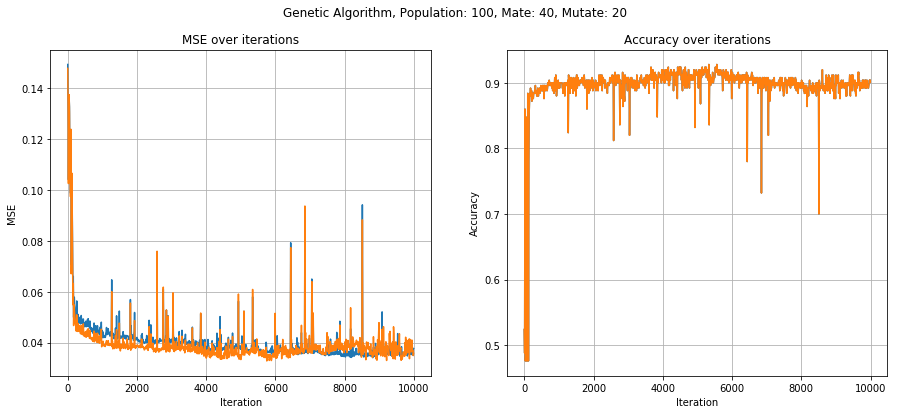

In [10]:
d = pd.read_csv("./assets/results/nn_weight/GA/GA_P100_mate40_mut20LOG.csv")
             
fig = plt.figure(figsize=(15,6))
fig.suptitle("Genetic Algorithm, Population: 100, Mate: 40, Mutate: 20")

ax = plt.subplot('121')
sns.lineplot(x='iteration', y='MSE_trg', data=d, ax=ax)
sns.lineplot(x='iteration', y='MSE_tst', data=d, ax=ax)
ax.set_title('MSE over iterations')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE')
plt.grid()

ax = plt.subplot('122')
sns.lineplot(x='iteration', y='acc_tst', data=d, ax=ax)
sns.lineplot(x='iteration', y='acc_tst', data=d, ax=ax)
ax.set_title('Accuracy over iterations')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
plt.grid()

plt.show()

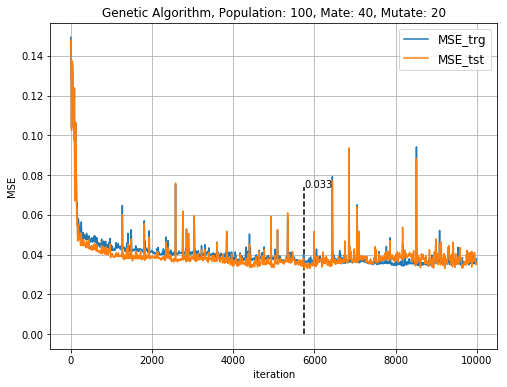

In [11]:
plot_train_test("./assets/results/nn_weight/GA/GA_P100_mate40_mut20LOG.csv", 
                "Genetic Algorithm, Population: 100, Mate: 40, Mutate: 20",
                True)